# The University of Hong Kong
## DASC7600 Data Science Project 2024
## EDA - HK - Case Counts

# Import Modules and Settings

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import covid_module

# Settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

%matplotlib inline

# Load Data

In [2]:
# Read csv file
# Dataset name: Data in Coronavirus Disease (COVID-19)
# URL: https://data.gov.hk/en-data/dataset/hk-dh-chpsebcddr-novel-infectious-agent
# Data resource name: Latest situation of reported cases of COVID-19 in Hong Kong (English)
covid_hk_case_count_df = pd.read_csv('./data/raw_data/hk/latest_situation_of_reported_cases_covid_19_eng.csv')

# Basic Information of Data Set

In [3]:
# Print first 10 records
covid_hk_case_count_df.head(10)

,As of date,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests,Number of positive nucleic acid test laboratory detections,Number of death cases related to COVID-19
0,08/01/2020,12:00,0.0,21.0,17.0,38.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,09/01/2020,12:00,0.0,25.0,23.0,48.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,10/01/2020,12:00,0.0,31.0,23.0,54.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,11/01/2020,12:00,0.0,46.0,15.0,61.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,12/01/2020,12:00,0.0,51.0,16.0,67.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5,13/01/2020,12:00,0.0,56.0,12.0,68.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6,14/01/2020,12:00,0.0,60.0,11.0,71.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
7,15/01/2020,12:00,0.0,66.0,10.0,76.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
8,16/01/2020,12:00,0.0,71.0,7.0,78.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
9,17/01/2020,12:00,0.0,75.0,6.0,81.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Basic information of dataframe
covid_hk_case_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 14 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   As of date                                                                   1238 non-null   object 
 1   As of time                                                                   194 non-null    object 
 2   Number of confirmed cases                                                    724 non-null    float64
 3   Number of ruled out cases                                                    89 non-null     float64
 4   Number of cases still hospitalised for investigation                         89 non-null     float64
 5   Number of cases fulfilling the reporting criteria                            89 non-null     float64
 6   Number of death cases                   

# Modify Data Types

In [5]:
# Modify data type for datatime column
covid_hk_case_count_df['As of date'] = pd.to_datetime(covid_hk_case_count_df['As of date'], format='%d/%m/%Y')

# Exploratory Data Analysis (EDA)

## Univariate Analysis

## Field - As of date

In [6]:
# Report date range of data set
min_date, max_date = covid_hk_case_count_df['As of date'].agg(['min', 'max']).astype('str').to_list()
print('Date range of as of date:')
print(f'Min date: {min_date}')
print(f'Max date: {max_date}')

Date range of as of date:
Min date: 2020-01-08
Max date: 2023-05-29


In [7]:
# Dates which are not included in the dataset
covid_hk_case_count_df = covid_hk_case_count_df.set_index('As of date', drop=False)
missing_date_index = pd.date_range(start=min_date, end=max_date).difference(covid_hk_case_count_df.index).astype('str')

if len(missing_date_index) == 0:
    print('There is no missing dates in the dataset.')
else:
    print(f'There are missing dates in the dataset, between {missing_date_index.min()} and {missing_date_index.max()}.')

There is no missing dates in the dataset.


In [8]:
print('All values are distinct:', covid_hk_case_count_df['As of date'].nunique() == covid_hk_case_count_df['As of date'].shape[0])

All values are distinct: True


## Field - As of time

In [9]:
# Distinct values in time column
print('Distinct values in time column are:',
      str(covid_hk_case_count_df['As of time'].drop_duplicates().to_list())[1:-1])

Distinct values in time column are: '12:00', '23:59', '16:00', nan


## Fields - Columns with Counts 

In [10]:
covid_module.print_cumulative_columns(covid_hk_case_count_df)

The cumulative columns in dataset are:
Number of ruled out cases
Number of cases fulfilling the reporting criteria
Number of death cases
Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests
Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests

The non-cumulative columns in dataset are:
Number of confirmed cases
Number of cases still hospitalised for investigation
Number of discharge cases
Number of probable cases
Number of hospitalised cases in critical condition
Number of positive nucleic acid test laboratory detections
Number of death cases related to COVID-19


The columns 'Number of confirmed cases' and 'Number of discharge cases' are cumulative columns indeed. <br>
There are only 2 dates (rows) that these 2 columns are not monotonic. 

For 'Number of confirmed cases', <br>
The values on 2021-09-02 to 2021-09-04 12113, 12112 and 12113 <br>
The values on 2021-10-08 to 2021-10-10 are 12253, 12230 and 12261

For 'Number of discharge cases', <br>
The values on 2021-09-02 to 2021-09-04 11799, 11798 and 11802 <br>
The values on 2021-10-08 to 2021-10-10 are 11945, 11926 and 11947

It is likely that the data points for 2021-09-03 and 2021-10-09 are not accurate. <br>
It is based on the following observations: <br>
1. There are a total of 724 non-null data points in the dataset, but only 2 of these data points (for the dates 2021-09-03 and 2021-10-09) exhibit non-monotonic behavior.
2. The value on 2021-09-04 is larger than the value on 2021-09-02, and the value on 2021-10-10 is larger than the value on 2021-10-08.

## Multivariate Analysis

## Fields - As of time and Number of confirmed cases

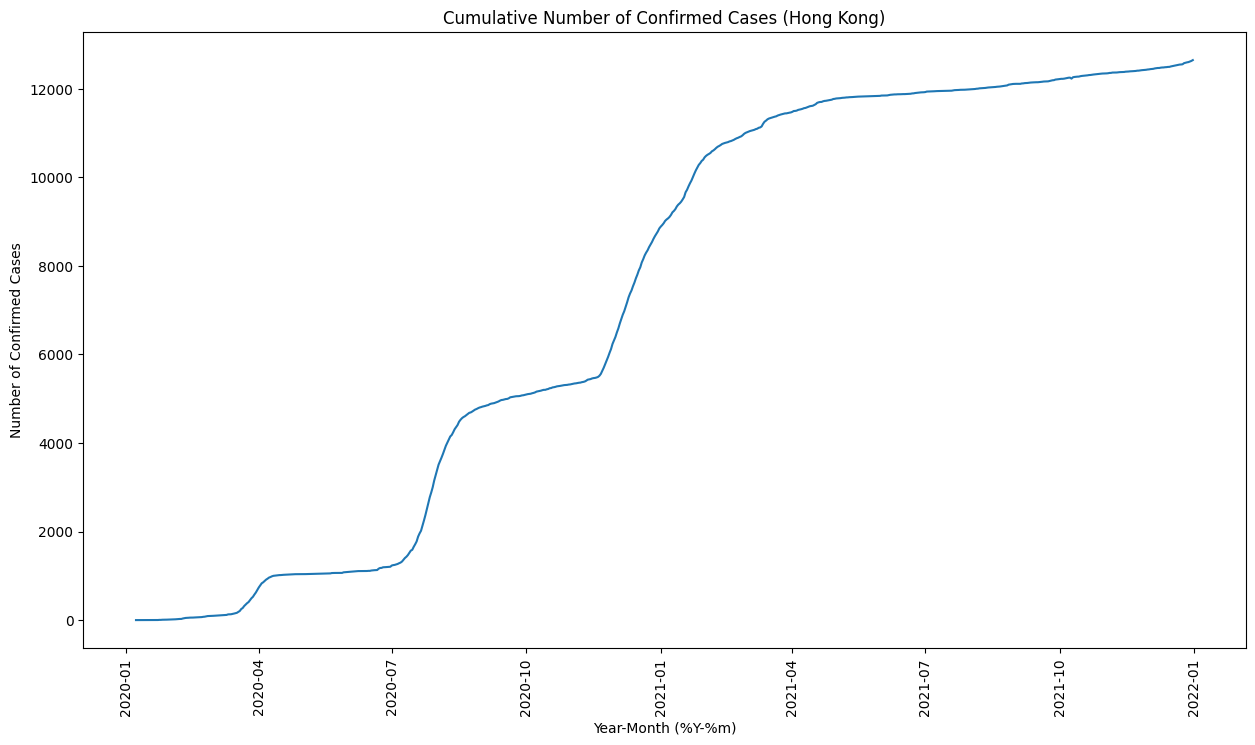

In [11]:
# Line chart - Cumulative Numbers of Confirmed Cases (Hong Kong)
plt.subplots(figsize=(15, 8))
plt.plot(covid_hk_case_count_df.index, covid_hk_case_count_df['Number of confirmed cases'])
plt.title('Cumulative Number of Confirmed Cases (Hong Kong)')
plt.xlabel('Year-Month (%Y-%m)')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=90)
plt.show()

## Missing Value Analysis

In [12]:
# Range of missing values in each column
for target_col in covid_hk_case_count_df.columns:
    if target_col not in ['As of date', 'As of time']:
        covid_module.print_range_of_missing_values(covid_hk_case_count_df, 'As of date', target_col)

There are missing values in the column "Number of confirmed cases":
From 2022-01-01 to 2023-05-29

There are missing values in the column "Number of ruled out cases":
From 2020-04-06 to 2023-05-29

There are missing values in the column "Number of cases still hospitalised for investigation":
From 2020-04-06 to 2023-05-29

There are missing values in the column "Number of cases fulfilling the reporting criteria":
From 2020-04-06 to 2023-05-29

There are missing values in the column "Number of death cases":
From 2023-01-30 to 2023-05-29

There are missing values in the column "Number of discharge cases":
From 2022-02-13 to 2022-04-25
From 2022-12-05 to 2023-05-29

There are missing values in the column "Number of probable cases":
From 2022-01-01 to 2023-05-29

There are missing values in the column "Number of hospitalised cases in critical condition":
From 2020-01-08 to 2020-04-05
From 2023-01-30 to 2023-05-29

There are missing values in the column "Number of cases tested positive for S

In [13]:
# Number of missing values in each column
covid_module.print_missing_val_count(covid_hk_case_count_df)

The following columns have missing values:
As of time: 1044 (84.3%)
Number of confirmed cases: 514 (41.5%)
Number of ruled out cases: 1149 (92.8%)
Number of cases still hospitalised for investigation: 1149 (92.8%)
Number of cases fulfilling the reporting criteria: 1149 (92.8%)
Number of death cases: 120 (9.7%)
Number of discharge cases: 248 (20.0%)
Number of probable cases: 514 (41.5%)
Number of hospitalised cases in critical condition: 209 (16.9%)
Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests: 844 (68.2%)
Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests: 900 (72.7%)
Number of positive nucleic acid test laboratory detections: 1118 (90.3%)
Number of death cases related to COVID-19: 1118 (90.3%)
